In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/Stock-Market-Analysis/')

In [2]:
raw_analyst_ratings_df=pd.read_csv('../data/raw_analyst_ratings.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


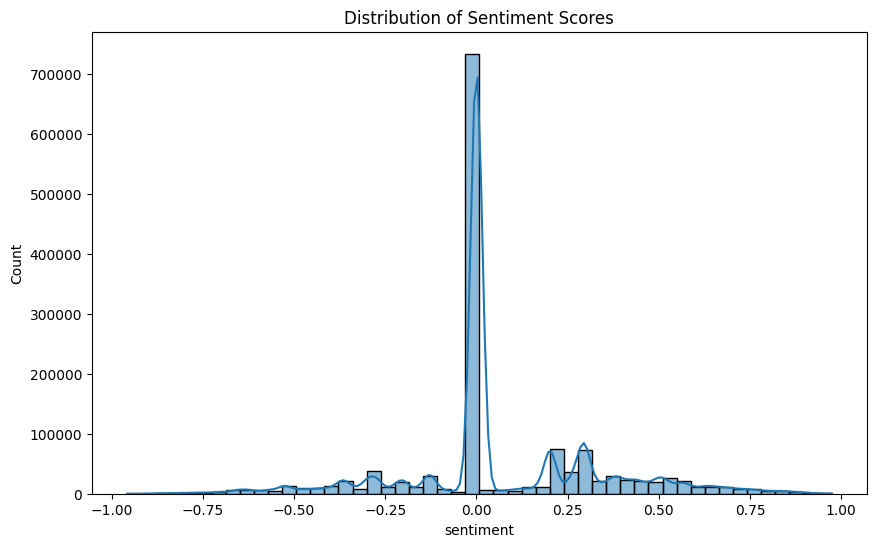

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to headlines
raw_analyst_ratings_df['sentiment'] = raw_analyst_ratings_df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Basic sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(raw_analyst_ratings_df['sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

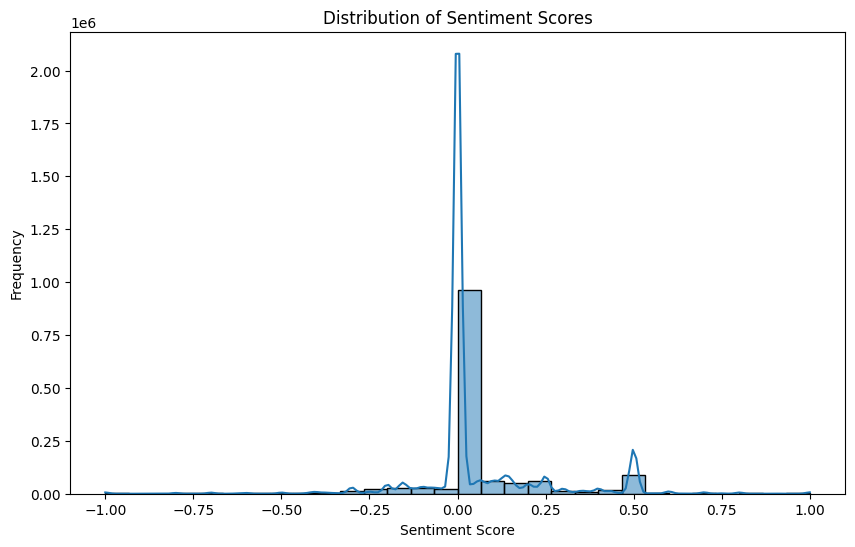

In [4]:
from textblob import TextBlob

# Define a function to get the sentiment of a headline
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each headline
raw_analyst_ratings_df['sentiment'] = raw_analyst_ratings_df['headline'].apply(get_sentiment)

# Display the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(raw_analyst_ratings_df['sentiment'], kde=True, bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [5]:
data_snippet = raw_analyst_ratings_df.head(50)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess text: you may want to perform additional cleaning steps
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(raw_analyst_ratings_df['headline'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words in each topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Top words in topic {i+1}:")
    print([words[i] for i in topic.argsort()[-10:]])
    print("\n")

# Optionally, assign topics to each headline
topic_results = lda.transform(X)
raw_analyst_ratings_df['topic'] = topic_results.argmax(axis=1)

# Display a few examples of headlines and their assigned topics
print(raw_analyst_ratings_df[['headline', 'topic']].head(10))


KeyboardInterrupt: 

In [7]:
df = raw_analyst_ratings_df['headline']
df

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd

# Sample DataFrame (assuming 'raw_analyst_ratings_df' is your DataFrame)
df = raw_analyst_ratings_df[['headline']].copy()

# Preprocess text: convert headlines to a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(df['headline'])

# Apply NMF for topic modeling
n_components = 5  # Number of topics
nmf = NMF(n_components=n_components, random_state=42)
nmf.fit(tfidf)

# Get the top words for each topic
words = tfidf_vectorizer.get_feature_names_out()
for i, topic in enumerate(nmf.components_):
    print(f"Top words in topic {i+1}:")
    print([words[j] for j in topic.argsort()[-10:]])
    print("\n")

# Assign topics to each headline
topic_results = nmf.transform(tfidf)
df['topic'] = topic_results.argmax(axis=1)

# Optionally, map topic numbers to topic labels (if desired)
topic_labels = {i: f'Topic {i+1}' for i in range(n_components)}
df['topic'] = df['topic'].map(topic_labels)

# Display a few examples of headlines and their assigned topics
print(df.head(10))


Top words in topic 1:
['thursday', 'tuesday', 'wednesday', 'day', 'mid', 'pre', 'stocks', 'market', 'session', 'moving']


Top words in topic 2:
['adj', 'q3', 'q1', 'q2', 'q4', 'sales', 'reports', 'eps', 'est', 'vs']


Top words in topic 3:
['2018', 'premarket', 'gainers', '2017', 'movers', '2019', 'initiations', 'downgrades', 'upgrades', 'benzinga']


Top words in topic 4:
['yesterday', 'set', 'new', 'hitting', 'lows', 'highs', 'hit', 'stocks', 'week', '52']


Top words in topic 5:
['initiates', '00', 'buy', 'raises', 'price', 'target', 'maintains', 'pt', 'scheduled', 'earnings']


                                            headline    topic
0            Stocks That Hit 52-Week Highs On Friday  Topic 4
1         Stocks That Hit 52-Week Highs On Wednesday  Topic 4
2                      71 Biggest Movers From Friday  Topic 1
3       46 Stocks Moving In Friday's Mid-Day Session  Topic 1
4  B of A Securities Maintains Neutral on Agilent...  Topic 5
5  CFRA Maintains Hold on Agilent Tech

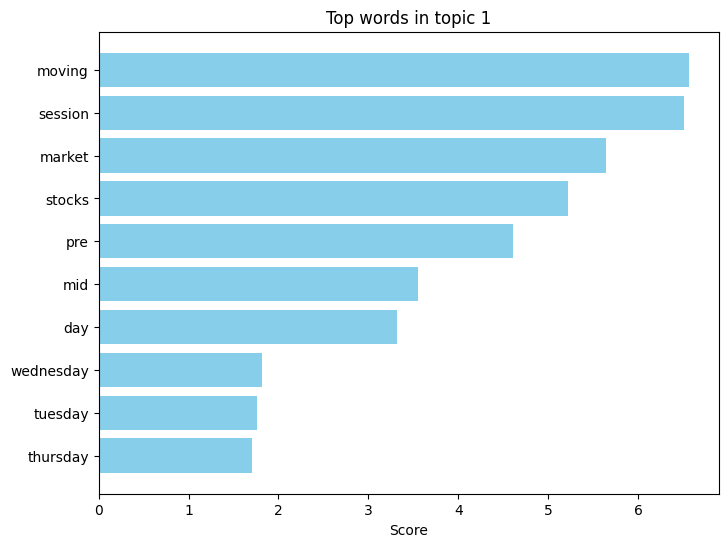

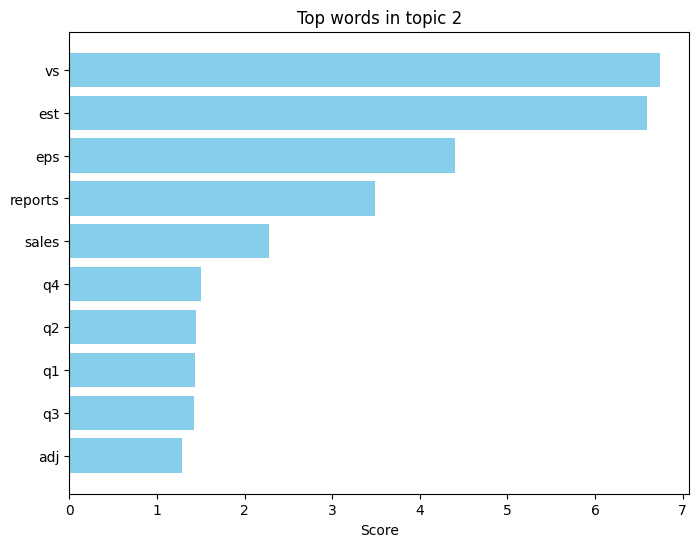

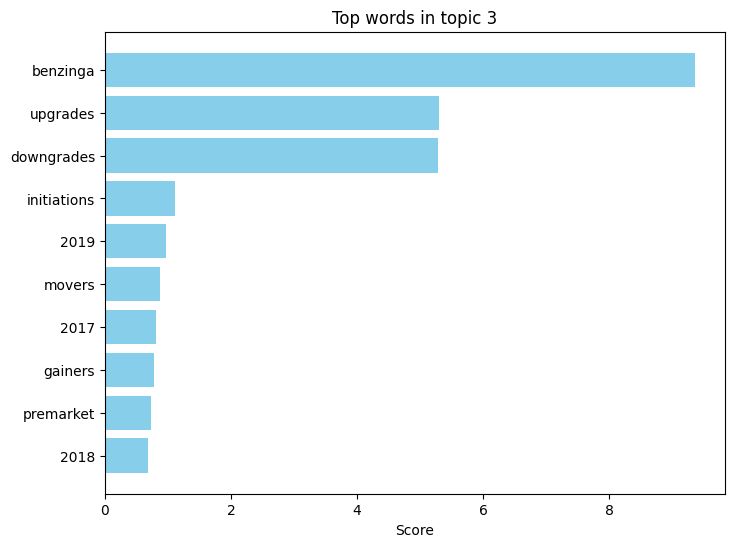

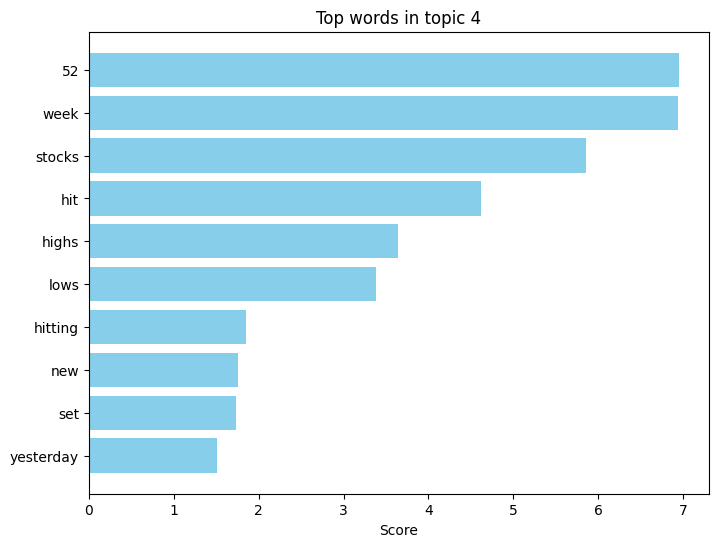

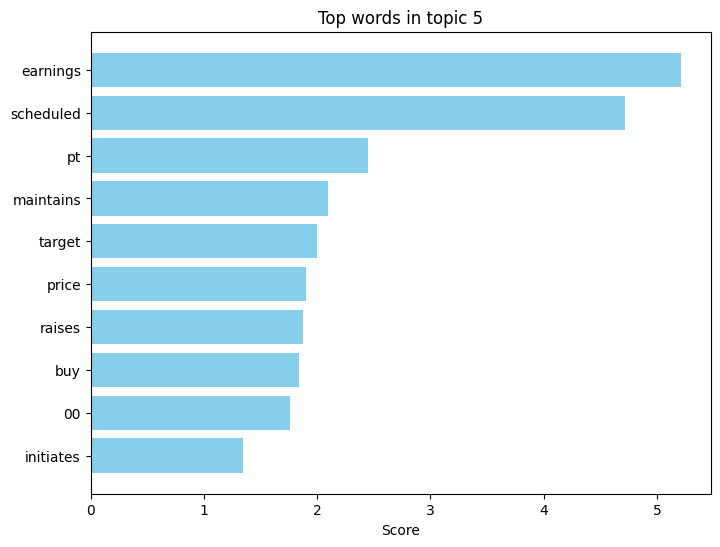

C:\Users\amanu\AppData\Local\Temp\ipykernel_19620\3044120617.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=df, palette='viridis')


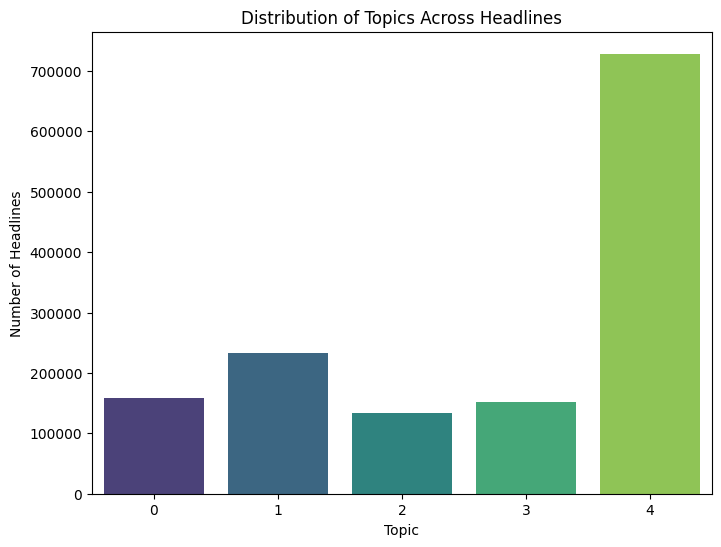

                                            headline  topic
0            Stocks That Hit 52-Week Highs On Friday      3
1         Stocks That Hit 52-Week Highs On Wednesday      3
2                      71 Biggest Movers From Friday      0
3       46 Stocks Moving In Friday's Mid-Day Session      0
4  B of A Securities Maintains Neutral on Agilent...      4
5  CFRA Maintains Hold on Agilent Technologies, L...      4
6  UBS Maintains Neutral on Agilent Technologies,...      4
7  Agilent Technologies shares are trading higher...      1
8  Wells Fargo Maintains Overweight on Agilent Te...      4
9         10 Biggest Price Target Changes For Friday      4


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
df = raw_analyst_ratings_df[['headline']].copy()

# Preprocess text: convert headlines to a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(df['headline'])

# Apply NMF for topic modeling
n_components = 5  # Number of topics
nmf = NMF(n_components=n_components, random_state=42)
nmf.fit(tfidf)

# Get the top words for each topic
words = tfidf_vectorizer.get_feature_names_out()

# Plot the top words for each topic
for i, topic in enumerate(nmf.components_):
    top_words_idx = topic.argsort()[-10:]  # Top 10 words for this topic
    top_words = [words[j] for j in top_words_idx]
    top_scores = topic[top_words_idx]

    plt.figure(figsize=(8, 6))
    plt.barh(top_words, top_scores, color='skyblue')
    plt.xlabel('Score')
    plt.title(f'Top words in topic {i+1}')
    plt.show()

# Assign topics to each headline
topic_results = nmf.transform(tfidf)
df['topic'] = topic_results.argmax(axis=1)

# Visualize the distribution of topics across headlines
plt.figure(figsize=(8, 6))
sns.countplot(x='topic', data=df, palette='viridis')
plt.title('Distribution of Topics Across Headlines')
plt.xlabel('Topic')
plt.ylabel('Number of Headlines')
plt.show()

# Display a few examples of headlines and their assigned topics
print(df.head(10))
